### Q1

Complete the code below showing the sequential posterior distributions created as each observation is observed.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Solution: 

### Likelihood:
The likelihood is the probability mass function of a binomial distribution:
$$
p(x \mid \theta, n) =\binom{n}{x} \theta^x (1 - \theta)^{n - x}
$$

---

### Prior: 
The prior is a discrete uniform distribution:
\begin{align*}
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\end{align*}

---

### Posterior Derivation
Using Bayes' theorem:
$$
p(\theta \mid x, n, \alpha) \propto p(x \mid \theta) \cdot p(\theta).
$$

Substituting the likelihood and prior, here we don't care about the normalization term, we only focus on the kernel part:
$$
p(\theta \mid x, n, \alpha) \propto \theta^x (1 - \theta)^{n - x} \cdot \frac{1}{101} ,
$$
for $\theta$ is 0.01, 0.02...1.

---

### Result
The posterior is a beta distribution: 
$$
p(\theta \mid x, n, \alpha) = \text{Beta}(x + 1, n - x + 1)
$$

Where:

- \(x\) is the number of successes observed.
- \(n\) is the total number of trials.

This is a **Beta distribution** with parameters:

$$
\alpha = x + 1 \quad \text{and} \quad \beta = n - x + 1.
$$

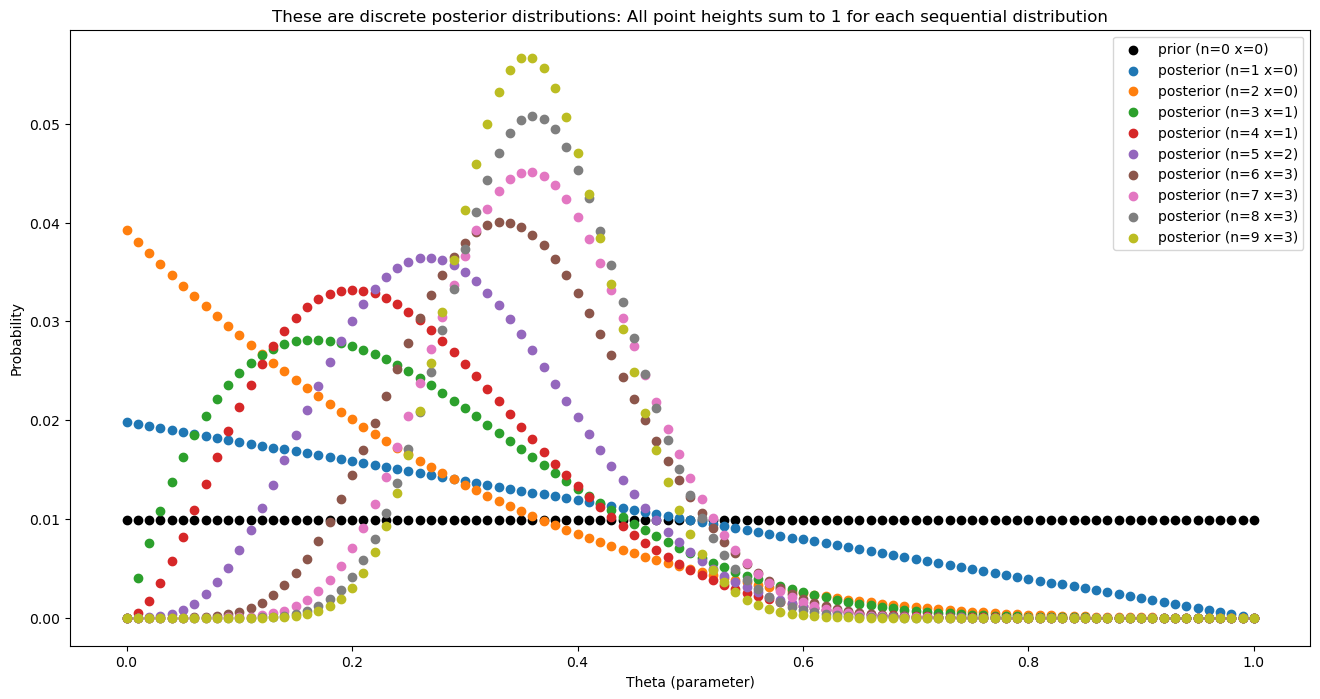

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

parameter_domain = np.linspace(0, 1, 101) 
prior = np.ones(101) / 101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")


for observation in observations:
    n += 1
    x += observation
    likelihood = parameter_domain**x * (1 - parameter_domain)**(n - x)
    posterior = prior * likelihood
    posterior /= posterior.sum() #normalize the posterior
    prior = posterior.copy() # for each Bernoulli observation update
    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend()
plt.xlabel("Theta (parameter)")
plt.ylabel("Probability")
plt.show()

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors 

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):` 

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*


###  1:

  $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}$$ follows beta distribution: 
  $$\text{Beta}(x_j^{(t)}+\alpha_j , n_j^{(t)}-x_j^{(t)}+\beta_j)$$
 

### Visualization: 

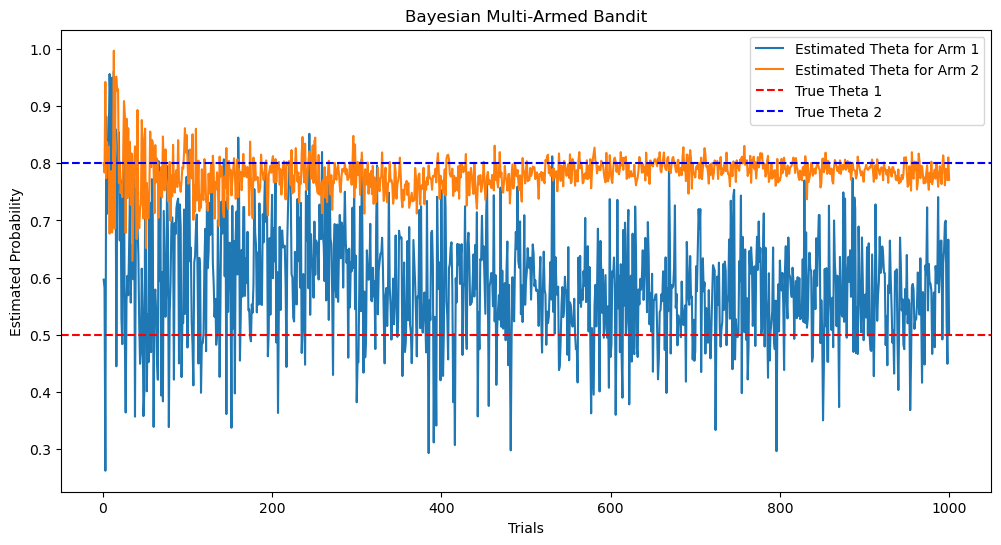

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#set seed 
np.random.seed(365)

# Parameters for the true success rates
theta_true = [0.5, 0.8]  # True probabilities for arm j=1 and arm j=2
m = 1000  # Monte Carlo samples
alpha, beta_params = [1, 1], [1, 1]  # Prior parameters for both arms

# set initial values
x_initial = [0, 0] #success
n_initial = [0, 0] #attempt

# Simulation
record = []
for t in range(m):
    # Sample theta from the posterior for each arm
    sampled_theta = [np.random.beta(alpha[j] + x_initial[j], beta_params[j] + (n_initial[j] - x_initial[j])) for j in range(2)]
    # Choose the arm with the highest sampled theta
    highest_sampled_theta = np.argmax(sampled_theta)
    
    # Simulate outcome based on the true probability of the chosen arm
    outcome = np.random.rand() < theta_true[highest_sampled_theta]
    
    # Update observations
    x_initial[highest_sampled_theta] += outcome
    n_initial[highest_sampled_theta] += 1
    
    # Track the sampled theta for visualization
    record.append((t + 1, sampled_theta[0], sampled_theta[1]))

# Plotting the learning process
record = np.array(record)
plt.figure(figsize=(12, 6))
plt.plot(record[:, 0], record[:, 1], label="Estimated Theta for Arm 1")
plt.plot(record[:, 0], record[:, 2], label="Estimated Theta for Arm 2")
plt.axhline(theta_true[0], color='r', linestyle='--', label="True Theta 1")
plt.axhline(theta_true[1], color='b', linestyle='--', label="True Theta 2")
plt.title("Bayesian Multi-Armed Bandit")
plt.xlabel("Trials")
plt.ylabel("Estimated Probability")
plt.legend()
plt.show()


### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data: 
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

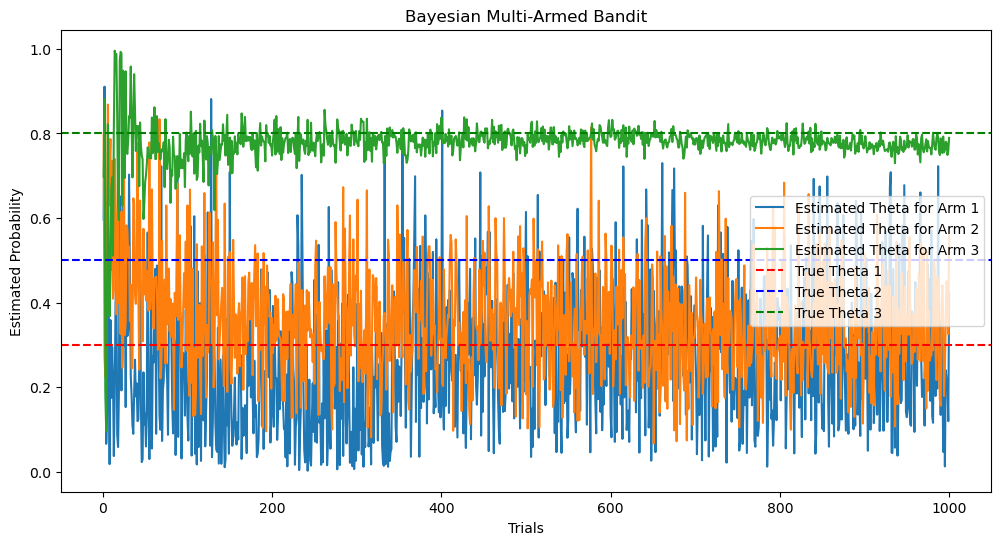

In [4]:
from scipy.stats import beta

#set seed 
np.random.seed(365)

# Parameters for the true success rates
theta_true = [0.3,0.5, 0.8]  # True probabilities for arm j=1 and arm j=2, j=3
m = 1000  # samples
alpha, beta_params = [1, 1,1], [1, 1,1]  # Prior parameters for both arms

# set initial values
x_initial = [0, 0, 0] #success
n_initial = [0, 0, 0] #attempt

# Simulation
record = []
for t in range(m):
    # Sample theta from the posterior for each arm
    sampled_theta = [np.random.beta(alpha[j] + x_initial[j], beta_params[j] + (n_initial[j] - x_initial[j])) for j in range(3)]
    # Choose the arm with the highest sampled theta
    highest_sampled_theta = np.argmax(sampled_theta)
    
    # Simulate outcome based on the true probability of the chosen arm
    outcome = np.random.rand() < theta_true[highest_sampled_theta]
    
    # Update observations
    x_initial[highest_sampled_theta] += outcome
    n_initial[highest_sampled_theta] += 1
    
    # Track the sampled theta for visualization
    record.append((t + 1, sampled_theta[0], sampled_theta[1], sampled_theta[2]))
    

# Plotting the learning process
record = np.array(record)
plt.figure(figsize=(12, 6))
plt.plot(record[:, 0], record[:, 1], label="Estimated Theta for Arm 1")
plt.plot(record[:, 0], record[:, 2], label="Estimated Theta for Arm 2")
plt.plot(record[:, 0], record[:, 3], label="Estimated Theta for Arm 3")
plt.axhline(theta_true[0], color='r', linestyle='--', label="True Theta 1")
plt.axhline(theta_true[1], color='b', linestyle='--', label="True Theta 2")
plt.axhline(theta_true[2], color='green', linestyle='--', label="True Theta 3")
plt.title("Bayesian Multi-Armed Bandit")
plt.xlabel("Trials")
plt.ylabel("Estimated Probability")
plt.legend()
plt.show()


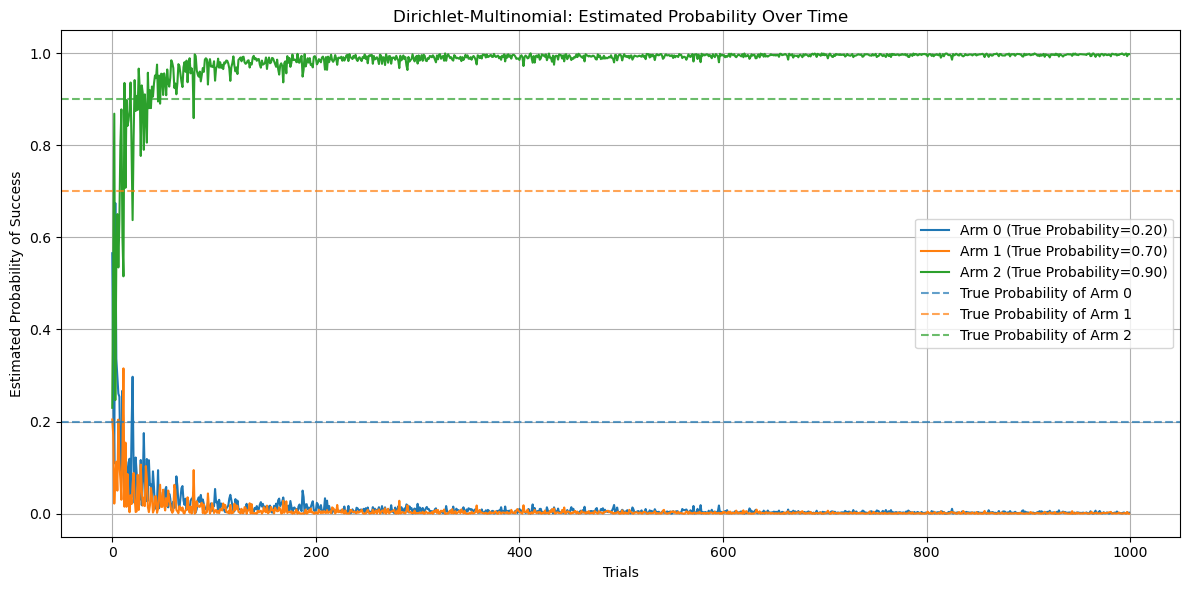

In [7]:
# Redoing the visualization for Analysis 2: Dirichlet-Multinomial model
#set seed 
np.random.seed(365)

# Define true click-through rates (CTRs) for 3 arms
true_theta = [0.2, 0.7, 0.9]  # True probabilities of success for each arm
n_arms = len(true_theta)
trials = 1000  # Total number of rounds (trials)

# Initialize parameters for the Dirichlet distribution (prior for all arms)
alpha_prior = np.ones(n_arms)  #uniform Dirichlet prior
successes = np.zeros(n_arms)  # Success counts for each arm
record = []  # To store estimated CTRs

# Simulate the Dirichlet-Multinomial process
for t in range(trials):
    # Sample probabilities for all arms from the Dirichlet distribution
    sampled_probs = np.random.dirichlet(alpha_prior + successes)
    
    # Select the arm with the highest sampled probability
    chosen_arm = np.argmax(sampled_probs)
    
    # Simulate the outcome for the chosen arm
    outcome = np.random.rand() < true_theta[chosen_arm]
    
    # Update success counts
    successes[chosen_arm] += outcome
    
    # Record the estimated probabilities (successes / total attempts for all arms)
    total_attempts = np.sum(successes) 
    estimated_probs = sampled_probs #successes / total_attempts
    record.append(estimated_probs)

record = np.array(record)

# Visualization
plt.figure(figsize=(12, 6))

# Plot the estimated probabilities for each arm over time
for i in range(n_arms):
    plt.plot(record[:, i], label=f"Arm {i} (True Probability={true_theta[i]:.2f})")

for i in range(n_arms):
    plt.axhline(y=true_theta[i], color=f"C{i}", linestyle='--', alpha=0.7, label=f"True Probability of Arm {i}")

plt.title("Dirichlet-Multinomial: Estimated Probability Over Time")
plt.xlabel("Trials")
plt.ylabel("Estimated Probability of Success")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Conclusion:

The main difference between these two approaches lies in whether the arms are treated independently.

In the context of multi-armed bandits (MAB), an arm refers to an option or choice that can be selected in the experiment. Treating arms independently means that the options or choices in the experiment are analyzed separately, without considering any potential relationships or shared information between them.

If the arms are truly independent, Analysis 1 (the Beta-Binomial approach) would be preferable, as it is designed for situations where each arm can be evaluated in isolation. Conversely, in cases where there is dependence or shared context between arms, Analysis 2 (the Dirichlet-Multinomial approach) is more suitable. Additionally, when the dataset is small, Analysis 2 is generally preferable because treating each arm independently (as in Analysis 1) requires a larger amount of data to produce reliable results.

AB testing with real world example:University of Toronto is preparing for Chinese New Year and wants to test five different hoodie designs to determine which is most popular among students. Each hoodie design features unique elements, such as red colors or Chinese New Year motifs (e.g., symbol of snake)
The bookstore aims to maximize sales during the promotional period while collecting enough data to confidently identify the most popular design. Since time is limited, it must balance exploration (testing all designs to gather sufficient data) and exploitation (focusing on the best-performing designs). The Dirichlet-Multinomial model is ideal for this scenario as it efficiently balances exploration and exploitation in a resource-limited, time-sensitive setting. 